In [1]:
# Thes effect of being in better physical condition and how that effects your grades. 
#Essentially, is there a correlation between physical exercise and GPA

## Dataset

In [35]:
#Metadata
#Steps: number of steps over the semester
#Mode: when the student did their 1 mile run, did they walk(0) or run(1)
#Gender: 1(female), 0 (male)
#Peak
#Cardio
#Fatburn
#Minutes: the number of minutes it took to run/walk a mile
#Age
#Life Score

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split

df = pd.read_csv("FitbitsAndGradesData_Fall2017.csv")
df

,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,1,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,1,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,0,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,1,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,0,18,2.87,83
...,...,...,...,...,...,...,...,...,...,...,...
576,577,10445,2.55,11.02,194.46,1,8.53,1,18,3.73,57
577,578,13537,0.10,1.54,87.39,1,6.55,0,18,3.93,53
578,579,7653,0.38,2.64,68.24,1,7.63,0,18,2.92,70
579,580,13828,3.17,8.00,189.69,1,8.25,1,18,3.94,73


## Descriptive Analytics

Mean for Steps and GPA
----------------------
Steps    10229.024096
GPA          3.186919
dtype: float64

Standard Deviation for Steps and GPA
------------------------------------
Steps    3067.141829
GPA         0.757748
dtype: float64

Median for Steps and GPA
------------------------
Steps    10284.00
GPA          3.35
dtype: float64


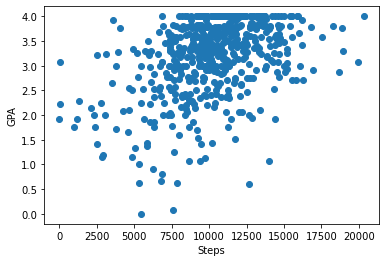

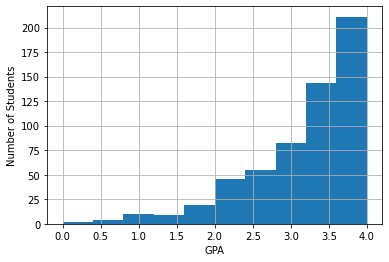

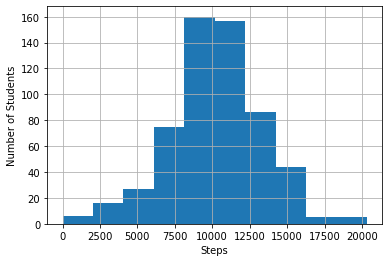

In [25]:
dfMean = df[['Steps', 'GPA']].mean()
dfStDev = df[['Steps', 'GPA']].std()
dfMedian = df[['Steps', 'GPA']].median()


print('Mean for Steps and GPA')
print('----------------------')
print(dfMean)
print()
print('Standard Deviation for Steps and GPA')
print('------------------------------------')
print(dfStDev)
print()
print('Median for Steps and GPA')
print('------------------------')
print(dfMedian)

x = df['Steps']
y = df['GPA']
plt.scatter(x, y)
plt.xlabel('Steps')
plt.ylabel('GPA')
plt.show()

df['GPA'].hist()
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.show()

df['Steps'].hist()
plt.xlabel('Steps')
plt.ylabel('Number of Students')
plt.show()

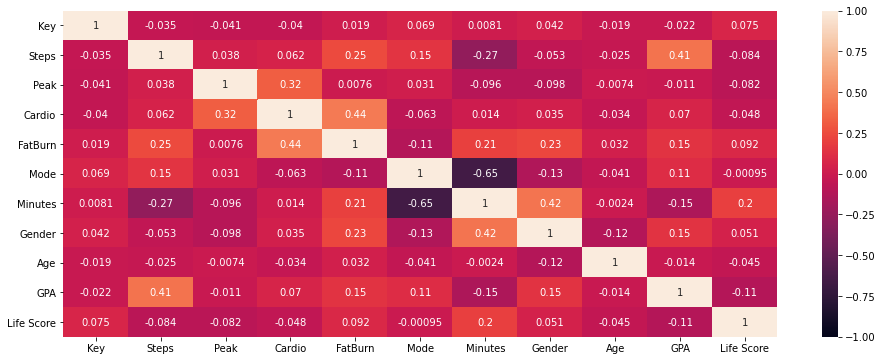

In [34]:
plt.figure(figsize=(16, 6))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True);

#As we can see from the heatmap, the correlation between the different attributes do not seem to be strongly correlated
# However, we can see that there is a small correlation between a students GPA and their number of steps

#from my observations here, the heatmap is showing that the correlation between a students GPA and the number of minutes 
# it took for a student to finish 1 mile have almost no correlation.

#But by looking at the Steps/GPA graph and the heatmap, we can deduced that a larger quantity of people who have a higher
#number of steps tend to do better. This is showing that there could be a small correlation between consistent
#physical exercise and a students GPA.

## Predictive Analysis

<AxesSubplot:xlabel='Steps', ylabel='GPA'>

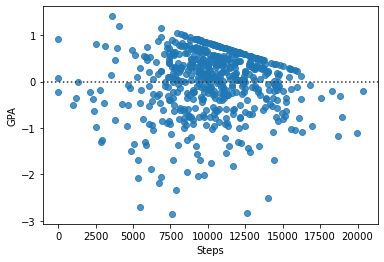

In [33]:
#The residual plot is supposed to follow the line in a horizontal manner. However, here it more or less does that.
#According to this residual plot, the data does not follow the 4 underlying
# assumptions for Regression Inferences (Population Regression Line, Equal Standard Deviation, Normal Populations
#, Independent Observations). Therefore, you probably should not use 
# linear regression to test for correlation. However, for the purposes of the
# project I decided to still make a linear regression model to predict GPA
sns.residplot(x='Steps', y='GPA', data=df)

Text(0.5, 1.0, 'Prediction on Test Data')

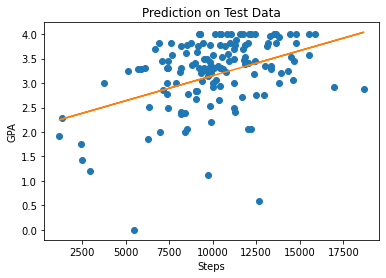

In [27]:
#Training the model by splitting the data
(X_train, X_test, Y_train, Y_test)\
         = train_test_split(df['Steps'], df['GPA'])

#Reshaping the data so that it returns a 2D array opposed to 1D array
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

pred_model = LinearRegression()
pred_model.fit(X_train, Y_train)
y_prediction = pred_model.predict(X_test)

plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, y_prediction)
plt.xlabel('Steps')
plt.ylabel('GPA')
plt.title('Prediction on Test Data')

In [31]:
#p-value and R (linear relationship)
from scipy import stats
r, p = stats.pearsonr(df['Steps'], df['GPA'])
print('R: ', round(r, 4))
print('P-value: ', round(p, 25))

R:  0.411
P-value:  4.0000000000000006e-25


In [21]:
# We can see here that with a r value of 0.41 we have a weak linear relationship between the variables and that the x 
# variable is a poor predictor for the y variable.

In [22]:
#Null Hypothesis: The population correlation coefficient is equal to 0
#Alternative hypothesis: The population correlation coefficient is NOT equal to 0
# alpha = 0.05

# If p-value < alpha, reject H0
# Since p-value (4.0000000000000006e-25) < alpha (0.05), we reject the null hypothesis and accept the alternative hypothesis

#Therefore, we conclude that there is some significant linear relationship between the number of steps a student takes over 
# a period of time and their GPA

# Seeing as this P-value is very small, it is extremely likely that we would see this type of correlation again
# if we were to do this study again with another random sample of 581 students.

## Other Analysis

Text(0, 0.5, 'GPA')

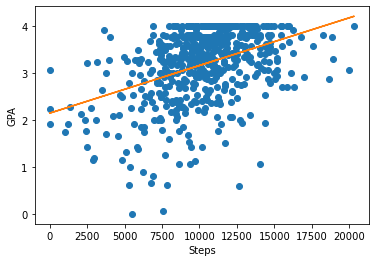

In [30]:
#Linear Regression on the entire data
length = 581 #number of rows

x2 = df['Steps'].values
y2 = df['GPA'].values

x2 = x2.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

model = LinearRegression()
model.fit(x2, y2)

y_pred = model.predict(x2)
plt.plot(x2,y2, 'o')
plt.plot(x2,y_pred)
plt.xlabel('Steps')
plt.ylabel('GPA')

In [32]:
#As we can see here, the linear regression line predicts a generalized version
# of the relationship between the number of steps and the GPA. However, just because 
# a student has the highest number of steps does not mean he will automatically
# get the highest grad.